In [1]:
import os
from pathlib import Path
import sys
colab = False
import warnings
warnings.filterwarnings('ignore')

In [2]:
ROOT = Path(os.getcwd())/'..'
DATA = ROOT/'data'
SRC =  ROOT/'src'
RAW_DATA = DATA/'raw'
RECORDS = ROOT/'records'
RESTAURANT_ATTRIBUTES = RECORDS/'restaurants'/'attribute'
RESTAURANT_ENTITIES = RECORDS/'restaurants'/'entity'
ATTR_FILES = os.listdir(RESTAURANT_ATTRIBUTES)
ENT_FILES = os.listdir(RESTAURANT_ENTITIES)
print(ROOT)

C:\Users\ibes222\Documents\Master\SS20\NLPLab\GitHub\notebooks\..


In [3]:
sys.path.append(str(SRC))

## Imports

In [4]:
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import statistic

In [5]:
if '.gitignore' in ATTR_FILES:
    ATTR_FILES.remove('.gitignore')
if '.gitignore' in ENT_FILES:
    ENT_FILES.remove('.gitignore')

In [6]:
attr_logs = statistic.load_logs_as_df(RESTAURANT_ATTRIBUTES, ATTR_FILES)
ent_logs = statistic.load_logs_as_df(RESTAURANT_ENTITIES, ENT_FILES)

In [7]:
logs = pd.concat([attr_logs, ent_logs])
logs.head()

,filename,abae_losses,classifier_losses,classifier_train_performance,classifier_eval_performance,dataset,label,embedding,binary,binary_target_class,...,use_micro_average,train_entities,target_class,freeze,save_training_records,use_linmodel,switch_to_relu,records_data_path,patience_early_stopping,save_model_path
0,training_2020-06-01_17-57-13,"[{'epoch': 0, 'model': 'binary-abae', 'loss': ...","[{'epoch': 0, 'model': 'classifier', 'loss': 2...","[{'f1': 0.5838020247469067, 'recall': 1.0, 'pr...","[{'f1': 0.5843828715365239, 'recall': 1.0, 'pr...",restaurants,attribute,glove,True,GENERAL,...,True,False,GENERAL,False,True,True,False,records/restaurants/attribute/,NaN,NaN
1,training_2020-06-01_18-17-26,"[{'epoch': 0, 'model': 'binary-abae', 'loss': ...","[{'epoch': 0, 'model': 'classifier', 'loss': 0...","[{'f1': 0.7922437673130194, 'recall': 0.836257...","[{'f1': 0.6486486486486486, 'recall': 0.631578...",restaurants,attribute,glove,True,PRICES,...,True,False,PRICES,False,True,True,False,records/restaurants/attribute/,NaN,NaN
2,training_2020-06-01_18-23-05,"[{'epoch': 0, 'model': 'binary-abae', 'loss': ...","[{'epoch': 0, 'model': 'classifier', 'loss': 1...","[{'f1': 0.35714285714285715, 'recall': 0.37841...","[{'f1': 0.5534591194968553, 'recall': 0.488888...",restaurants,attribute,glove,True,QUALITY,...,True,False,QUALITY,False,True,True,False,records/restaurants/attribute/,NaN,NaN
3,training_2020-06-01_18-46-27,"[{'epoch': 0, 'model': 'binary-abae', 'loss': ...","[{'epoch': 0, 'model': 'classifier', 'loss': 2...","[{'f1': 0.09878048780487805, 'recall': 0.07803...","[{'f1': 0.0, 'recall': 0.0, 'precision': 0.0, ...",restaurants,attribute,glove,True,GENERAL,...,True,False,GENERAL,False,True,True,False,records/restaurants/attribute/,NaN,NaN
4,training_2020-06-01_19-01-41,"[{'epoch': 0, 'model': 'binary-abae', 'loss': ...","[{'epoch': 0, 'model': 'classifier', 'loss': 0...","[{'f1': 0.4602510460251045, 'recall': 0.625, '...","[{'f1': 0.0, 'recall': 0.0, 'precision': 0.0, ...",restaurants,attribute,glove,True,MISCELLANEOUS,...,True,False,MISCELLANEOUS,False,True,True,False,records/restaurants/attribute/,NaN,NaN


In [8]:
attributes = attr_logs[attr_logs.binary].binary_target_class.dropna().unique().tolist()
attributes

['GENERAL', 'PRICES', 'QUALITY', 'MISCELLANEOUS', 'NaN', 'STYLE_OPTIONS']

In [9]:
entities = logs[logs.label.eq('entity')].binary_target_class.unique().tolist()
entities

['AMBIENCE', 'DRINKS', 'FOOD', 'SERVICE', 'NaN', 'RESTAURANT', 'LOCATION']

## Generating Plots

In [10]:
SELECTION = {
        'dataset':'restaurants', 
        'train_entities':False, 
        'embedding':'bert-base-cased', 
        'use_kcl': [True, False], 
        #'lr':[0.0005, 0.00005], 
        'binary':True, 
        'binary_target_class' : 'GENERAL'
    }

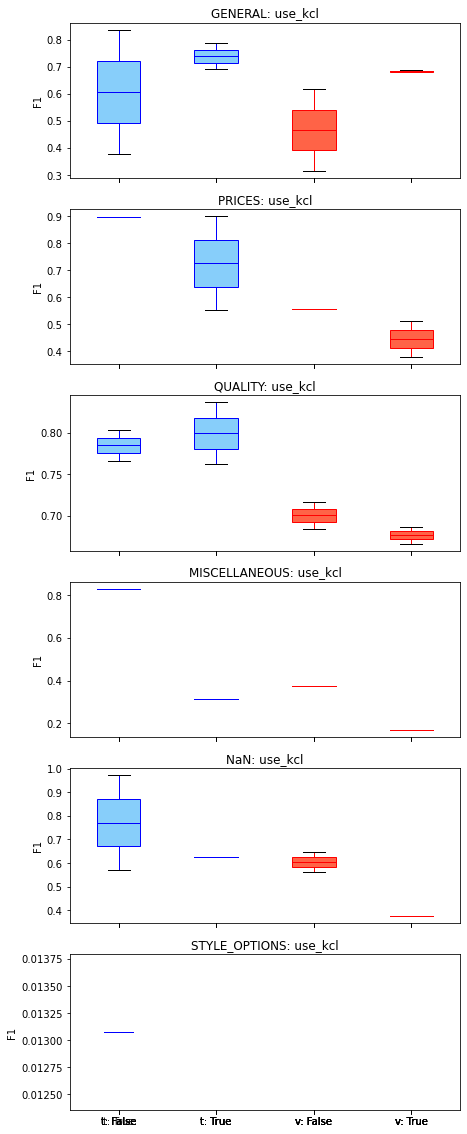

In [11]:
fig, axs = plt.subplots(len(attributes), sharex=True, figsize=(7,20))
for index, attribute in enumerate(attributes):
    SELECTION['binary_target_class'] = attribute
    rows = statistic.get_rows(logs, SELECTION)
    statistic.calculate_statistics(rows, 'use_kcl', metric='f1', subplot=axs[index], selection=SELECTION)

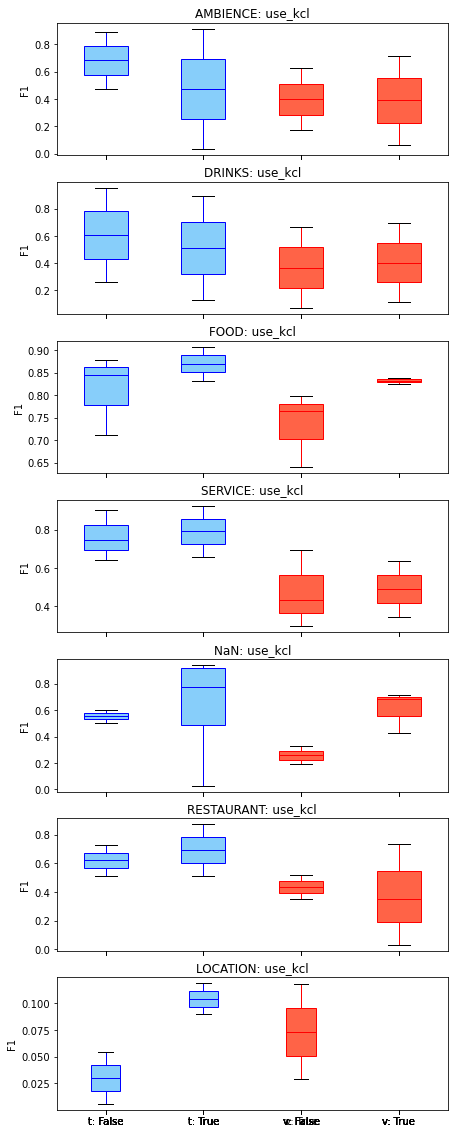

In [12]:
SELECTION['train_entities'] = True
fig, axs = plt.subplots(len(entities), sharex=True, figsize=(7,20))
for index, entity in enumerate(entities):
    SELECTION['binary_target_class'] = entity
    rows = statistic.get_rows(logs, SELECTION)
    statistic.calculate_statistics(rows, 'use_kcl', metric='f1', subplot=axs[index], selection=SELECTION)